<a href="https://colab.research.google.com/github/yandod/machine-learning-examples/blob/main/07_openai_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title [1-1] ライブラリのインストール
!pip install openai japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c774235f589b8ac7ed796c4f689d5dece668b8a29662b074b7c099ccc5cd7071
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [2]:
#@title [1-2] OpenAIの設定

import os
import openai
from google.colab import userdata

# Load your API key from an environment variable or secret management service
openai.api_key = '' #@param

import os

#Secretを使わない場合は上記の openai.api_keyで上書き
if openai.api_key == '':
  os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')
else:
  os.environ["OPENAI_API_KEY"] = openai.api_key

#埋め込み用モデルの設定
model = 'text-embedding-3-small' #@param['text-embedding-3-small','text-embedding-3-large','text-embedding-ada-002']

In [3]:
#@title [2-1] 指定した単語の埋め込み表現を取得
word = 'トマト' #@param

from openai import OpenAI
client = OpenAI()

response = client.embeddings.create(
    input=word,
    model=model
)

response.data[0].embedding

[-0.04059261083602905,
 -0.00961850956082344,
 -0.030539393424987793,
 0.0015239716740325093,
 -0.009318712167441845,
 -0.06547582149505615,
 -0.014460242353379726,
 0.04496965557336807,
 -0.013830667361617088,
 -0.03583581745624542,
 0.040772486478090286,
 0.027061739936470985,
 0.003982312977313995,
 0.0022434862330555916,
 -0.04085243493318558,
 0.03815425559878349,
 -0.02834087610244751,
 -0.02662203647196293,
 -0.060998838394880295,
 0.028820553794503212,
 0.03117896243929863,
 -0.002408374799415469,
 -0.021805286407470703,
 -0.0007907164399512112,
 0.034796521067619324,
 0.06455644220113754,
 0.02458341233432293,
 0.02090589329600334,
 -0.002279711654409766,
 -0.02062608301639557,
 -0.007584881968796253,
 -0.058640431612730026,
 0.024723317474126816,
 0.002848078263923526,
 0.02142554335296154,
 -0.057641107589006424,
 0.006150849629193544,
 0.013111152686178684,
 0.017128441482782364,
 -0.00035882036900147796,
 -0.053084179759025574,
 0.016478881239891052,
 0.02005646750330925,


In [4]:
#@title [3-1] 文章に対応する埋め込み表現をモデルから取得
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

words = [
  'みんなのコード、「第5回情報教育の未来を考える”若手”勉強会」を開催',
  '東京大学で開催される「生成AI時代の情報教育」シンポジウムに、みんなのコード宮島が登壇いたします。',
  'みんなのコードと日本女子大学附属中学校がテクノロジー分野で社会に貢献する力を培うカリキュラムを開発',
  'みんなのコード、公共交通手段のないエリアの子どもたちに向けて「MINIで無料送迎サービス」を提供',
  'みんなのコード、千葉県における情報教育の充実と発展を推進に関する連携協定締結',
  '閣議の概要について',
  '石破総理はＧ２０リオデジャネイロ・サミット出席等のためブラジル連邦共和国のリオデジャネイロを訪問しました（２日目）',
  '石破総理は在ペルー日系人との懇談において挨拶しました',
  '石破総理はＧ２０リオデジャネイロ・サミット出席等のためブラジル連邦共和国のリオデジャネイロを訪問しました（１日目）'
]


vectors = []
for word in words:
  embeding = client.embeddings.create(
    input=word,
    model=model
  ).data[0].embedding

  vectors.append(embeding)

vectors[:2]

[[0.004595463164150715,
  -0.0063655260019004345,
  -0.045452091842889786,
  0.014361520297825336,
  0.06794361770153046,
  0.013523951172828674,
  -0.03700939193367958,
  0.07464417070150375,
  0.007197511848062277,
  -0.014495532028377056,
  0.03345809876918793,
  -0.01598082110285759,
  -0.037746451795101166,
  -0.03464186191558838,
  0.0034256582148373127,
  -0.011061497963964939,
  -0.04525107517838478,
  -0.023139245808124542,
  0.021140247583389282,
  0.03301139548420906,
  0.0081914272159338,
  -0.012105667032301426,
  0.06097504124045372,
  0.006566542666405439,
  0.012362522073090076,
  -0.011837645433843136,
  -0.0006449283100664616,
  0.03426216542720795,
  0.04563077166676521,
  0.02304990589618683,
  0.0031297169625759125,
  -0.026869220659136772,
  -0.018270177766680717,
  0.009810728020966053,
  -0.00442794943228364,
  0.00852645467966795,
  4.9948790547205135e-05,
  0.00749345263466239,
  0.011396525427699089,
  -0.02185497246682644,
  0.05740141123533249,
  -0.0578034

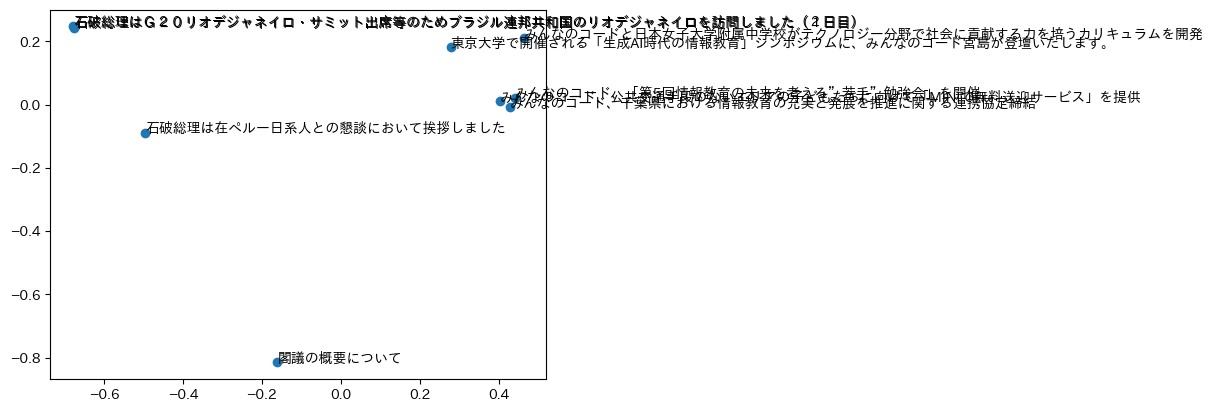

In [5]:
#@title [4-1] PCAで次元削減してプロット
from sklearn.decomposition import PCA

# PCAの適用
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# プロット
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


In [6]:
#@title [5-1] マウス操作に対応したPlotlyでプロットする
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px

# PCAで3つの主成分を抽出
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(vectors)

# DataFrameに変換
import pandas as pd
df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])

# 3Dプロット
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', text=words)
fig.show()
